## ARIMA and Seasonal ARIMA
## (AUTOREGRESSIVE INTEGRATED MOVING AVERAGE)

The general process for ARIMA models is the following:

    - Visualize the Time series Data
    - Make the time series data stationary
    - Plot the Correlation and AutoCorrelation Charts
    - Construct the ARIMA MODEL based on the data
    - Use the model to make predictions

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df1 = pd.read_csv('Perrin Freres monthly champagne sales millions.csv')

In [4]:
df1.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [5]:
df1.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [6]:
## cleaning up the data
df1.columns=['Month','Sales']
df1.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [6]:
df1.tail()

,Month,Sales
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [9]:
## Drop last 2 rows
df1.drop(105,axis=0,inplace=True)
df1.drop(106,axis=0,inplace=True)

In [10]:
df1.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [11]:
df1.dtypes

Month     object
Sales    float64
dtype: object

In [12]:
df1['Month'] = pd.to_datetime(df1['Month'])

In [13]:
df1.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [ ]:
df1.set_index('Month',inplace=True)

In [11]:
df1.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [12]:
df1.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


# Step 2: Visualize the Data 

<Axes: >

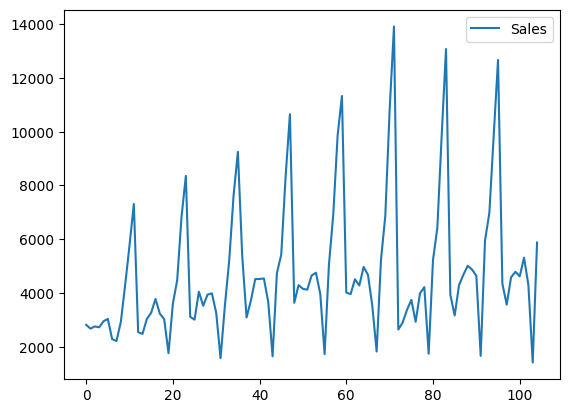

In [13]:
df1.plot()

In [25]:
## Testing For Stationary

!pip install statsmodels


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
from statsmodels.tsa.stattools import adfuller

In [32]:
test_result = adfuller(df1['Sales'])

In [15]:
# test_result

In [17]:
# HO: It is non stationary
# H1: It is stationary

In [18]:
from statsmodels.tsa.stattools import adfuller

# Define the adfuller_test function
def adfuller_test(sales):
    result = adfuller(sales)
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations used']
    for value, label in zip(result, labels):
        print(f'{label}: {value}')
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis, reject the null hypothesis.")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root.")

# Example usage
adfuller_test(df1['Sales'])


ADF Test Statistic: -1.8335930563276184
p-value: 0.36391577166024713
#Lags Used: 11
Number of Observations used: 93
Weak evidence against null hypothesis, time series has a unit root.


## Differencing

In [40]:
df1['Sales First Difference'] = df1['Sales'] -  df1['Sales'].shift(1)

In [41]:
df1['Sales'].shift(1)

0         NaN
1      2815.0
2      2672.0
3      2755.0
4      2721.0
        ...  
100    4788.0
101    4618.0
102    5312.0
103    4298.0
104    1413.0
Name: Sales, Length: 105, dtype: float64

In [44]:
## 
df1['Seasonal First Difference'] = df1['Sales']- df1['Sales'].shift(12)

In [45]:
df1.head(14)

,Month,Sales,Sales First Difference,Seasonal First Difference
0,1964-01,2815.0,NaN,NaN
1,1964-02,2672.0,-143.0,NaN
2,1964-03,2755.0,83.0,NaN
3,1964-04,2721.0,-34.0,NaN
4,1964-05,2946.0,225.0,NaN
5,1964-06,3036.0,90.0,NaN
6,1964-07,2282.0,-754.0,NaN
7,1964-08,2212.0,-70.0,NaN
8,1964-09,2922.0,710.0,NaN
9,1964-10,4301.0,1379.0,NaN


In [46]:
## Again test dickey fuller test
adfuller_test(df1['Seasonal First Difference'].dropna())

ADF Test Statistic: -7.626619157213166
p-value: 2.0605796968136632e-11
#Lags Used: 0
Number of Observations used: 92
Strong evidence against the null hypothesis, reject the null hypothesis.


<Axes: >

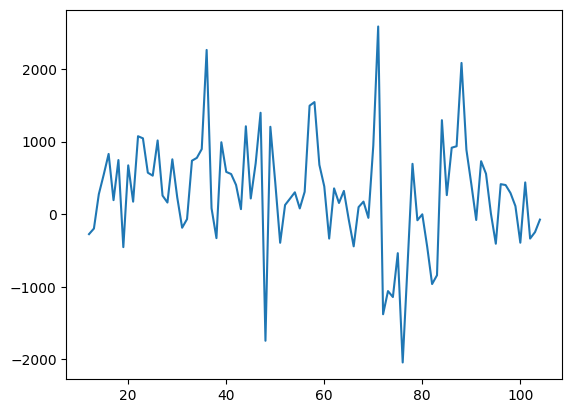

In [47]:
df1['Seasonal First Difference'].plot()

## Auto Regressive Model

In [60]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

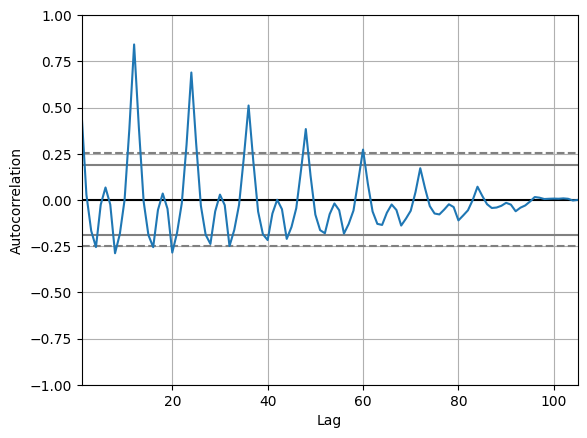

In [62]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df1['Sales'])
plt.show()

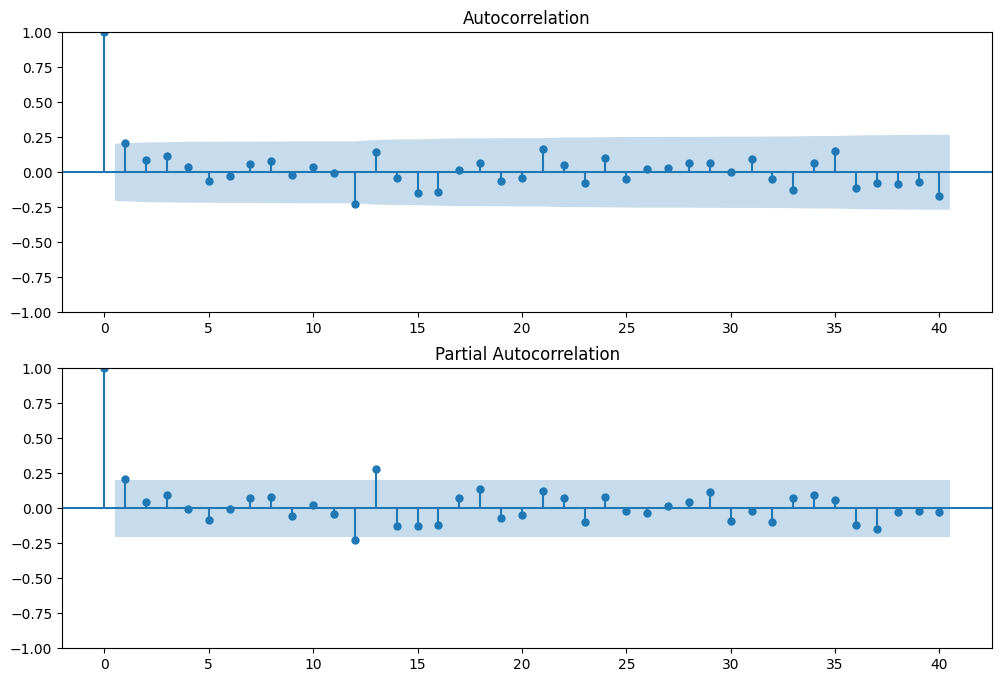

In [64]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df1['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df1['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

Here these two graphs will help you to find the p and q values.
- Partial AutoCorrelation Graph is for the p-value.
- AutoCorrelation Graph for the q-value.

3. ARIMA MODEL
Let’s Break it Down:-

AR: Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations.

I: Integrated. The use of differencing of raw observations in order to make the time series stationary.

MA: Moving Average. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.

In [74]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [62]:
import statsmodels.api as sm

# Assuming df1['Sales'] is your time series data

order = (1, 1, 1)  # (p, d, q) order for ARIMA
model = sm.tsa.ARIMA(df1['Sales'], order=order)

# Fit the model
model_fit = model.fit()

# You can now use model_fit to make predictions and analyze the results


In [54]:
# import statsmodels.api as sm
# from statsmodels.tsa.statespace.sarimax import SARIMAX

# # Assuming df1['Sales'] is your time series data

# # For non-seasonal ARIMA (p, d, q)
# order = (1, 1, 1)
# model = SARIMAX(df1['Sales'], order=order)
# model_fit = model.fit()

# # For seasonal ARIMA (p, d, q, s)
# # You need to specify the seasonal_order parameter (P, D, Q, S) for seasonal ARIMA
# seasonal_order = (1, 1, 1, 12)  # Example seasonal order for monthly data
# model = SARIMAX(df1['Sales'], order=order, seasonal_order=seasonal_order)
# model_fit = model.fit()


In [56]:
# model_fit.summary()

<Axes: >

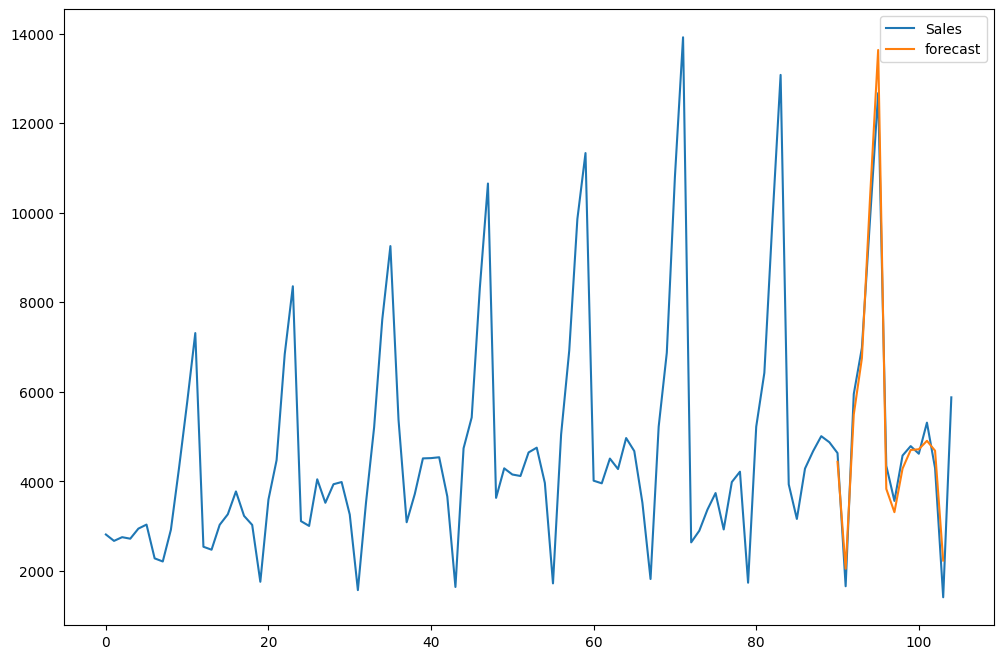

In [79]:
df1['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df1[['Sales','forecast']].plot(figsize=(12,8))

## SARIMA MODEL


In [81]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df1['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

<Axes: >

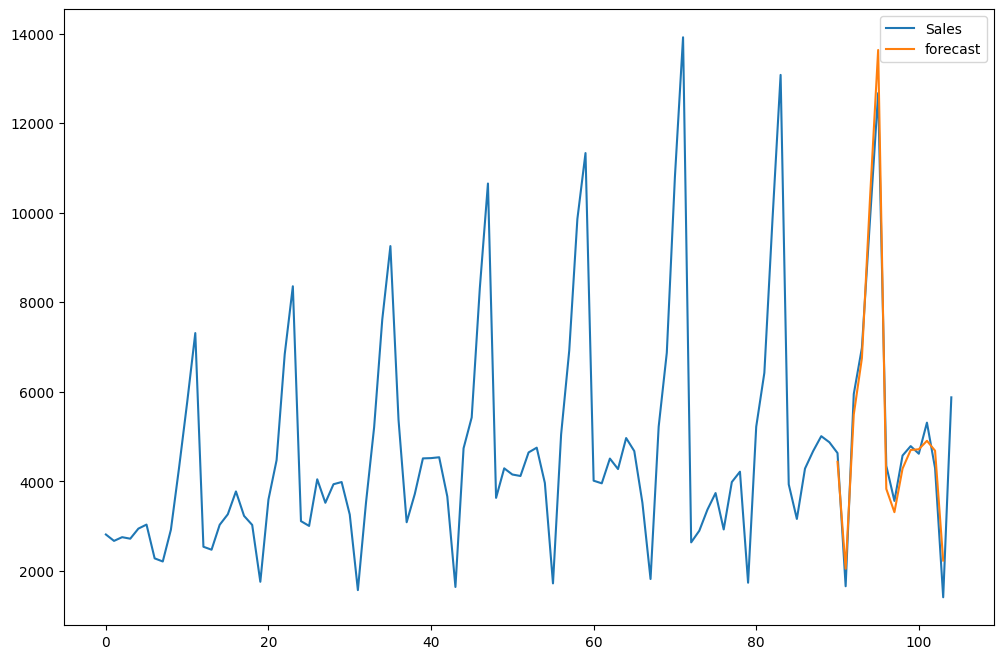

In [82]:
df1['forecast']=results.predict(start=90,end=103,dynamic=True)
df1[['Sales','forecast']].plot(figsize=(12,8))

# 4. PREDICT FOR FUTURE DATASET

In [85]:
import pandas as pd
from pandas.tseries.offsets import DateOffset

# Assuming df1['Sales'] is your time series data

# Convert the index to a datetime index
df1.index = pd.to_datetime(df1.index)

# Create future dates using DateOffset
future_dates = [df1.index[-1] + DateOffset(months=x) for x in range(1, 25)]

# You can now use the future_dates list for prediction or other purposes


C:\Users\sharm\AppData\Local\Temp\ipykernel_22388\3590449148.py:10: UserWarning: Discarding nonzero nanoseconds in conversion.
  future_dates = [df1.index[-1] + DateOffset(months=x) for x in range(1, 25)]


In [57]:
#Convert that list into DATAFRAME:

future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df1.columns)

In [58]:
future_datest_df.tail()

,Month,Sales
1974-05-01,NaN,NaN
1974-06-01,NaN,NaN
1974-07-01,NaN,NaN
1974-08-01,NaN,NaN
1974-09-01,NaN,NaN


In [89]:
#CONCATE THE ORIGINAL AND THE NEWLY CREATED DATASET FOR VISUALIZATION PURPOSE:
future_df=pd.concat([df1,future_datest_df])

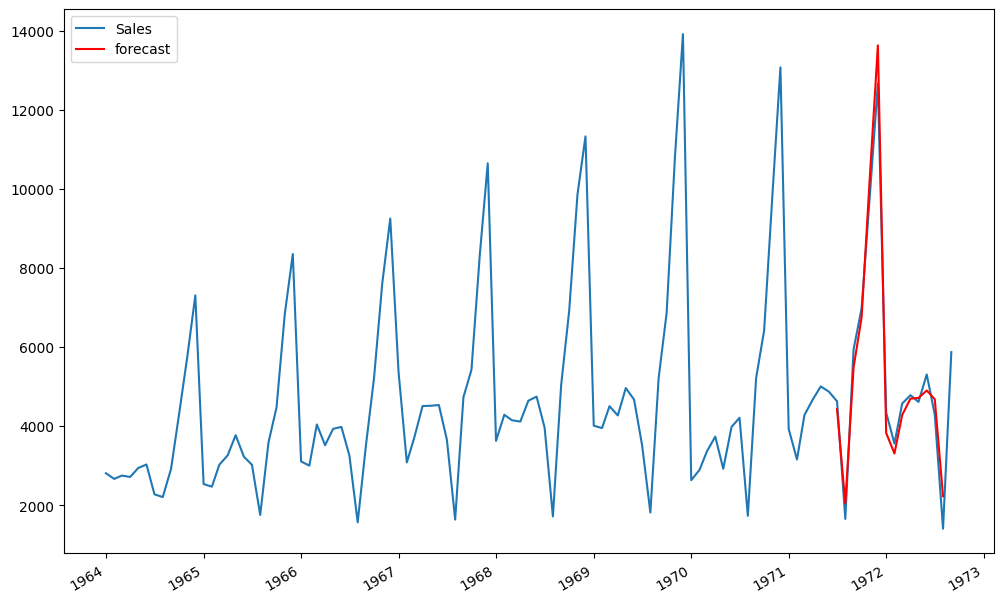

In [61]:
import matplotlib.pyplot as plt

# Assuming future_df has columns 'Sales' and 'forecast' containing the data
# and forecasted values respectively

# Plot the 'Sales' and 'forecast' columns
ax = future_df[['Sales', 'forecast']].plot(figsize=(12, 8))

# Set the color for the 'forecast' line
ax.lines[1].set_color('red')  # You can change 'red' to any other color you prefer

# Show the legend
plt.legend(loc='upper left')

# Show the plot
plt.show()



# import matplotlib.pyplot as plt

# # Assuming future_df has columns 'Sales' and 'forecast' containing the data
# # and forecasted values respectively

# # Plot the 'Sales' and 'forecast' columns
# ax = future_df.plot(figsize=(12, 8))

# # Set the color for the 'forecast' line (assuming it's the second column)
# forecast_color = 'red'  # You can change 'red' to any other color you prefer
# ax.lines[1].set_color(forecast_color)

# # Set the labels for the legend
# ax.legend(['Sales', 'Forecast'], loc='upper left')

# # Show the plot
# plt.show()

